In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


In [2]:
import matplotlib.pyplot as plt
import plotly.express as ex
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler ,StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


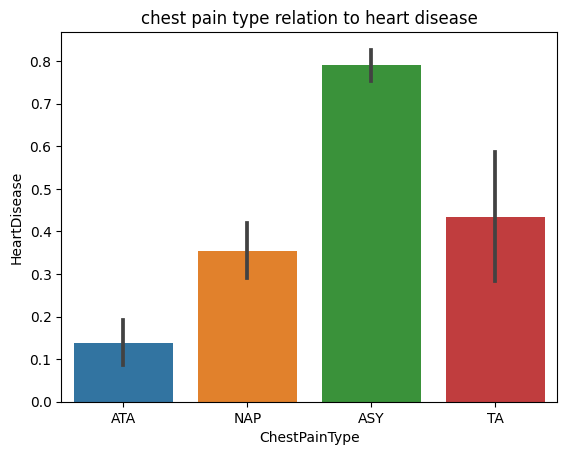

In [6]:
sns.barplot(x="ChestPainType", y="HeartDisease", data=df)
plt.title('chest pain type relation to heart disease')
plt.show()


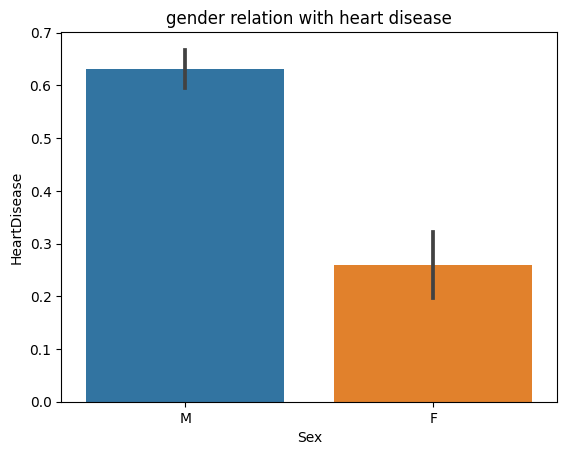

In [7]:
sns.barplot(x="Sex", y="HeartDisease", data=df)
plt.title('gender relation with heart disease')
plt.show()

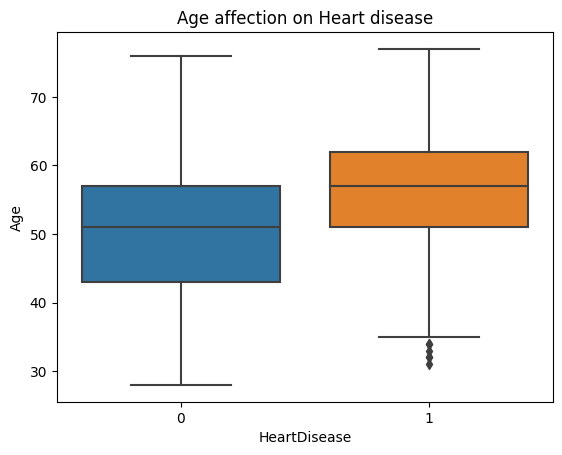

In [8]:
sns.boxplot(x="HeartDisease", y="Age", data=df)
plt.title('Age affection on Heart disease')
plt.show()


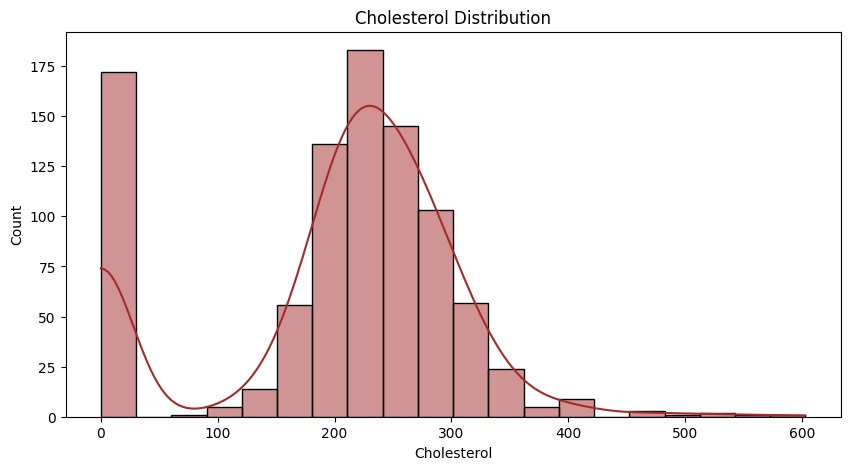

In [9]:
plt.figure(figsize=(10,5))
sns.histplot(df['Cholesterol'],bins=20, kde= True, color= 'brown')
plt.title('Cholesterol Distribution')
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [11]:
df['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [12]:
df['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [13]:
df['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [14]:
df['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [15]:
df['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [16]:
sex_map = {'M': 0, 'F': 1}
slope_map = {'Flat': 0,'Up': 1 ,'Down': 2}
angina_map = {'N': 0,'Y':1}
resting_map = {'Normal':0 ,'LVH':1 ,'ST':2}
chestpain_map = {'ASY':0,'NAP':1,'ATA': 2,'TA':3}

df['Sex']=df['Sex'].map(sex_map)
df['ST_Slope']=df['ST_Slope'].map(slope_map)
df['ExerciseAngina']=df['ExerciseAngina'].map(angina_map)
df['RestingECG']=df['RestingECG'].map(resting_map)
df['ChestPainType']=df['ChestPainType'].map(chestpain_map)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [18]:
def remove_outliers_iqr(df):
    numerical_cols = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol','FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina','Oldpeak', 'ST_Slope', 'HeartDisease']
    
    for column in numerical_cols:

        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

df_no_outliers = remove_outliers_iqr(df)

df_no_outliers.reset_index(drop=True, inplace=True)

print(f"Original DataFrame shape: {df.shape}")
print(f"DataFrame shape after outlier removal: {df_no_outliers.shape}")

Original DataFrame shape: (918, 12)
DataFrame shape after outlier removal: (660, 12)


In [19]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

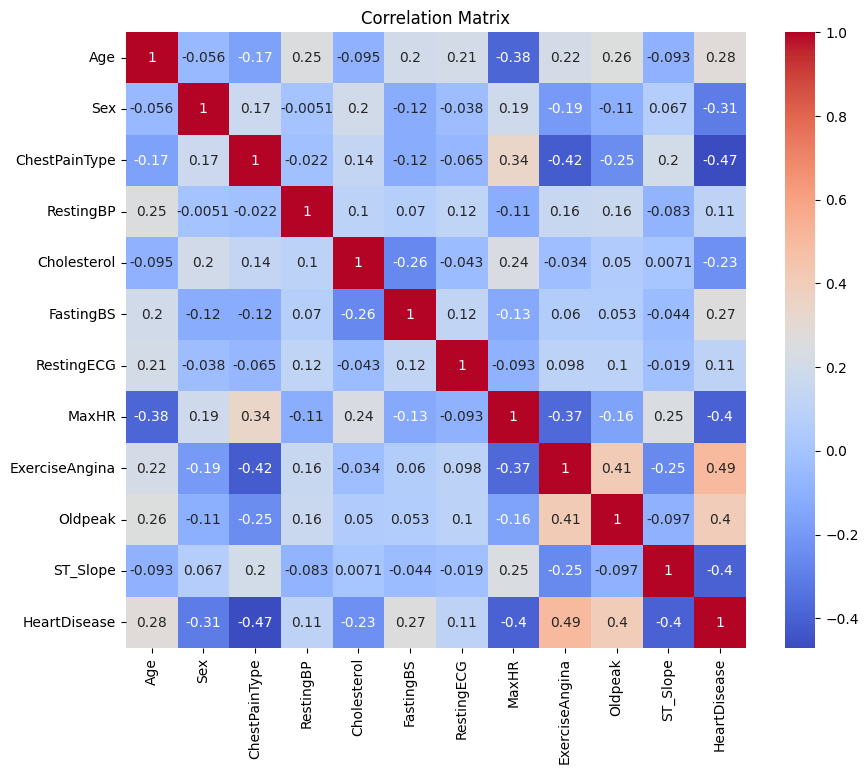

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True ,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [21]:
threshold = 0.03
correlation_matrix = df.corr()
high_correlation_features = correlation_matrix.index[abs(correlation_matrix['HeartDisease'])>threshold].tolist()
high_correlation_features.remove('HeartDisease')
high_correlation_features.remove('RestingECG')
high_correlation_features.remove('Cholesterol')
high_correlation_features.remove('RestingBP')
print(high_correlation_features)
X_selected = df[high_correlation_features]
Y = df['HeartDisease']

['Age', 'Sex', 'ChestPainType', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']


In [22]:
X_train ,X_test ,Y_train ,Y_test = train_test_split(X_selected , Y ,test_size=0.2 ,shuffle=True ,random_state=55)

In [23]:
scaler = StandardScaler()

# Fit the scaler on training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optionally, convert back to DataFrame for better interpretability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [24]:
X_train.isnull().sum()

Age               0
Sex               0
ChestPainType     0
FastingBS         0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
dtype: int64

In [25]:
model = LogisticRegression(max_iter=1000 ,random_state=42)
model.fit(X_train_scaled ,Y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [26]:
Y_pred = model.predict(X_test_scaled)
print(accuracy_score(Y_test ,Y_pred))

0.8532608695652174


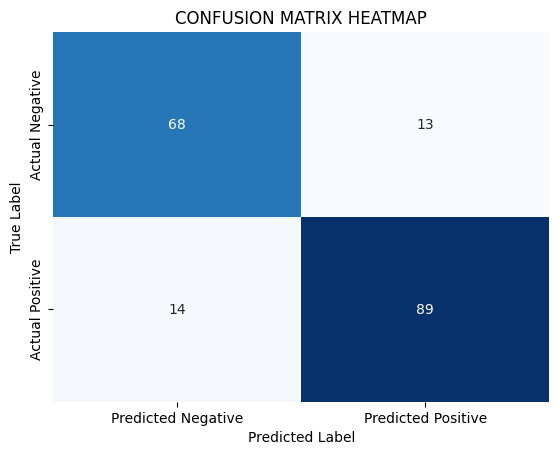

In [27]:
conf_matrix = confusion_matrix(Y_test ,Y_pred)

sns.heatmap(conf_matrix ,annot=True ,fmt='d' ,cmap='Blues' ,cbar=False ,xticklabels =['Predicted Negative','Predicted Positive'] ,yticklabels =['Actual Negative','Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CONFUSION MATRIX HEATMAP')
plt.show()

In [28]:
model2 = SVC()
model2.fit(X_train_scaled ,Y_train)

SVC()

In [29]:
Y_pred2 =model2.predict(X_test_scaled)
print(accuracy_score(Y_test ,Y_pred2))

0.8695652173913043


In [30]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

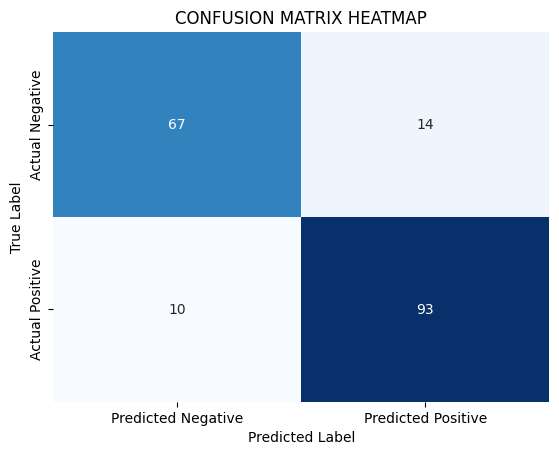

In [31]:
conf_matrix2 = confusion_matrix(Y_test ,Y_pred2)

sns.heatmap(conf_matrix2 ,annot=True ,fmt='d' ,cmap='Blues' ,cbar=False ,xticklabels =['Predicted Negative','Predicted Positive'] ,yticklabels =['Actual Negative','Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CONFUSION MATRIX HEATMAP')
plt.show()

In [32]:
knn.fit(X_train_scaled ,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
Y_pred_knn =knn.predict(X_test_scaled)
print(accuracy_score(Y_test ,Y_pred_knn))

0.8532608695652174


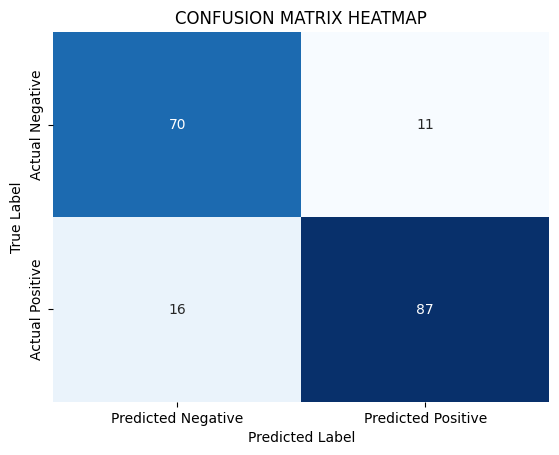

In [34]:
conf_matrix3 = confusion_matrix(Y_test ,Y_pred_knn)

sns.heatmap(conf_matrix3 ,annot=True ,fmt='d' ,cmap='Blues' ,cbar=False ,xticklabels =['Predicted Negative','Predicted Positive'] ,yticklabels =['Actual Negative','Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CONFUSION MATRIX HEATMAP')
plt.show()

In [35]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf.fit(X_train_scaled, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [36]:
Y_pred_clf = clf.predict(X_test_scaled)
print(accuracy_score(Y_test ,Y_pred_clf))

0.8369565217391305


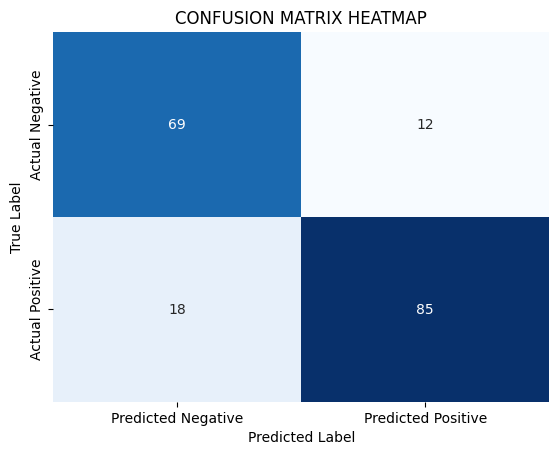

In [37]:
conf_matrix4 = confusion_matrix(Y_test ,Y_pred_clf)

sns.heatmap(conf_matrix4 ,annot=True ,fmt='d' ,cmap='Blues' ,cbar=False ,xticklabels =['Predicted Negative','Predicted Positive'] ,yticklabels =['Actual Negative','Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CONFUSION MATRIX HEATMAP')
plt.show()